In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

#importing warnings to suppress warning arises
import warnings
warnings.filterwarnings('ignore')

In [2]:
##accesing the data from the file folder
c=pd.read_csv('C:/Users/hp/Downloads/CardiovascularDiseaseDetection/cardio_train.csv',sep=';')
cardio=pd.DataFrame(c)

#lets see the structure of the data
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [3]:
#shape of the data
cardio.shape

(69301, 13)

In [4]:
#lets get the datatypes info
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
#age column in the the terms of days,so we need to impute it first
cardio['age']=cardio['age']/365

In [6]:
#we see id column has all random values and has also no significance in imputing target,so lets drop it first
cardio.drop('id',axis=1,inplace=True)

In [7]:
cardio.duplicated().sum()

24

In [8]:
cardio[cardio.duplicated()].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
9863,56.150685,1,165,70.0,120,80,1,1,0,0,1,0
21085,46.008219,1,165,68.0,120,80,1,1,0,0,1,0
37806,52.021918,1,164,65.0,120,80,1,1,0,0,1,0
39666,39.868493,1,158,64.0,120,80,1,1,0,0,1,0
41751,50.282192,1,169,67.0,120,80,1,1,0,0,1,0


In [9]:
cardio.drop_duplicates(inplace=True)

In [10]:
#checking for the null values
cardio.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Lets go for visualisation

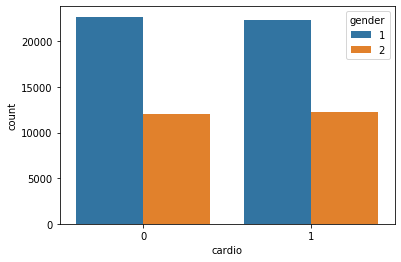

In [11]:
#lets see the counts of the disease type
sns.countplot(x='cardio',hue='gender',data=cardio)

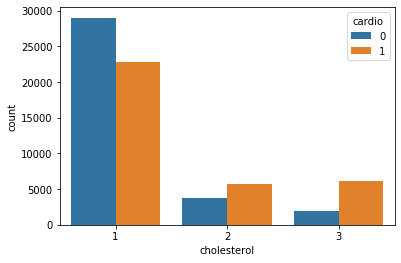

In [12]:
sns.countplot(x='cholesterol', hue='cardio', data=cardio)

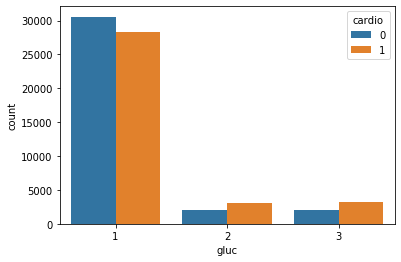

In [13]:
sns.countplot(x='gluc', hue='cardio', data=cardio)

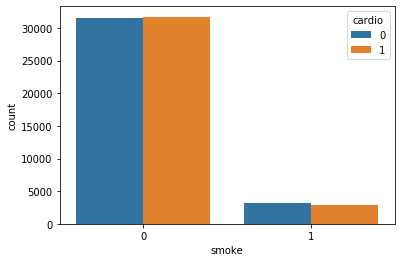

In [14]:
sns.countplot(x='smoke', hue='cardio', data=cardio)

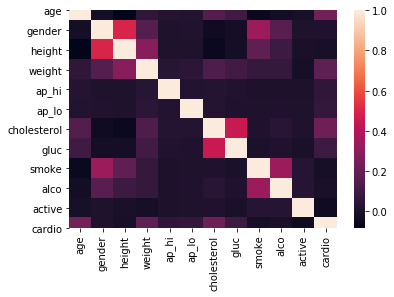

In [15]:
sns.heatmap(cardio.corr())

In [16]:
#Calculating the pressure using high & low given blood pressure
cardio['pulse pressure'] = cardio['ap_hi'] - cardio['ap_lo']

In [17]:
#we have extracted the pulse pressure,so there is no point to keep them in dataset
cardio.drop(['ap_hi','ap_lo'],axis=1,inplace=True)

In [18]:
#Statstical summary of data
cardio.describe()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,pulse pressure
count,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000
mean,53.339374,1.349597,164.362140,74.205884,1.366933,1.226525,0.088081,0.053900,0.803975,0.499661,32.176783
std,6.759962,0.476846,8.206439,14.384935,0.680354,0.572330,0.283415,0.225821,0.396990,0.500003,242.490143
min,29.583562,1.000000,55.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-10800.000000
25%,48.397260,1.000000,159.000000,65.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,40.000000
50%,53.983562,1.000000,165.000000,72.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,40.000000
75%,58.427397,2.000000,170.000000,82.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,50.000000
max,64.967123,2.000000,250.000000,200.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,15940.000000


Some of the feature has huge outliers,so applying zscore & boxcox

In [19]:
from scipy.stats import zscore
z=np.abs(zscore(cardio))
cardio_new=cardio[(z<3).all(axis=1)]
cardio_new.shape

(55130, 11)

#after applying there is diffrence of 15000 rows,so lets take modified one as a main dataset
cardio=cardio_new

In [20]:
cardio=cardio_new

In [21]:
#segregating dependant and independent variables
def_x=cardio.drop('cardio',axis=1)
y=cardio['cardio']

In [22]:
#check for the skew data
def_x.skew()

age               -0.289479
gender             0.902734
height             0.099030
weight             0.573801
cholesterol        2.018405
gluc               3.202002
smoke              0.000000
alco               0.000000
active            -1.498200
pulse pressure   -15.173703
dtype: float64

In [23]:
#adjusting for skewed values
for index in def_x.skew().index:
    if def_x.skew().loc[index]>0.5:
        def_x[index]=np.log1p(def_x[index])
    if def_x.skew().loc[index]<-0.5:
        def_x[index]=np.square(def_x[index])

In [24]:
#now we need to scale the input values,so using standard scalar for that
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
mod_x=scale.fit_transform(def_x)

#putting the values to the dataframe
x=pd.DataFrame(mod_x,columns=def_x.columns)

In [25]:
#function for determining random state
def random(alg):
    r_state=0
    for r_score in range(43,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        if accuracy > r_state:
            r_state=accuracy
            final_r=r_score
    print(r_state,'at',final_r)

In [26]:
#creating function for algorithm operations and metrics
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    score=ml.score(x_train,y_train)
    print('score=',score)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [27]:
#function for cross_val score 
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5)
    print(score)
    print('mean_score=',score.mean())
    print('standard deviation',score.std())

In [28]:
def roc(alg):
    y_pred_prob=alg.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('false_Positive_rate')
    plt.ylabel('True positive rate')
    plt.title(alg)
    plt.show()
    roc_score=roc_auc_score(y_test,alg.predict(x_test))
    print('roc_auc_score=',roc_score)

Now,we are set to apply algorithm one by one

Logistic regression

In [29]:
# lets start using linear_model first
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
random(lr)

0.6914747430330347 at 57


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=57)
model(lr)

score= 0.6837317594823619
0.6914747430330347
[[7181 2212]
 [3401 5399]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      9393
           1       0.71      0.61      0.66      8800

    accuracy                           0.69     18193
   macro avg       0.69      0.69      0.69     18193
weighted avg       0.69      0.69      0.69     18193



In [31]:
cross_val(lr)

[0.66500408 0.68129875 0.67921277 0.67495012 0.67655329]
mean_score= 0.6754038010013983
standard deviation 0.00563808434556814


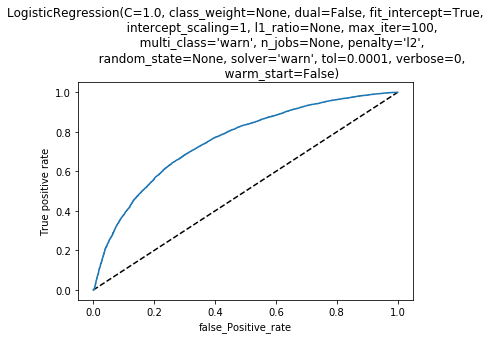

roc_auc_score= 0.6890141050395362


In [32]:
roc(lr)

Decision Tree

In [33]:
#checking the data using decision tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
random(dtc)

0.6094651789149673 at 46


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=66)
model(dtc)

score= 0.999729268754907
0.6060023085802232
[[5755 3534]
 [3634 5270]]
              precision    recall  f1-score   support

           0       0.61      0.62      0.62      9289
           1       0.60      0.59      0.60      8904

    accuracy                           0.61     18193
   macro avg       0.61      0.61      0.61     18193
weighted avg       0.61      0.61      0.61     18193



In [35]:
cross_val(dtc)

[0.59961912 0.61019409 0.59459459 0.60067114 0.60027211]
mean_score= 0.6010702095590809
standard deviation 0.005061237285255558


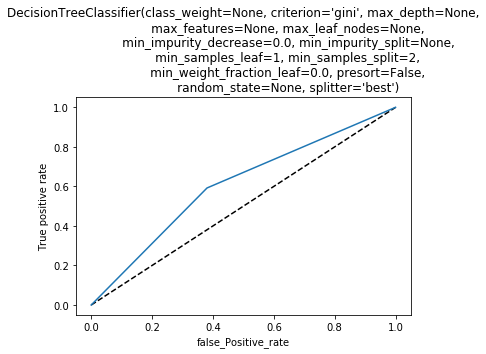

roc_auc_score= 0.6057094141918046


In [36]:
roc(dtc)

K-neighbors Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=100)
random(knn)

0.6661902929698236 at 64


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=64)
model(knn)

score= 0.6635081354739151
0.6661902929698236
[[6955 2459]
 [3614 5165]]
              precision    recall  f1-score   support

           0       0.66      0.74      0.70      9414
           1       0.68      0.59      0.63      8779

    accuracy                           0.67     18193
   macro avg       0.67      0.66      0.66     18193
weighted avg       0.67      0.67      0.66     18193



In [39]:
cross_val(knn)

[0.65194523 0.66687829 0.65517867 0.66415745 0.66040816]
mean_score= 0.6597135581886071
standard deviation 0.005522249228749122


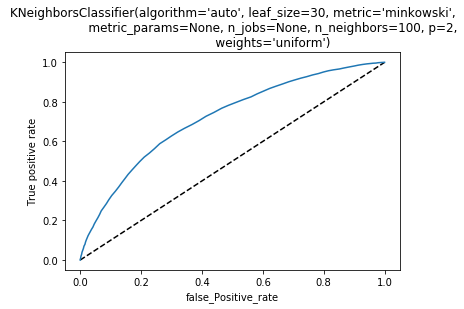

roc_auc_score= 0.6635645439692752


In [40]:
roc(knn)

Support Vector Machine

In [41]:
from sklearn.svm import SVC

In [42]:
svm=SVC()
parameters={'kernel':['rbf','linear'],'C':[1,10,100]}
gd=GridSearchCV(svm,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
svm=SVC(kernel='rbf',C=10,probability=True)
random(svm)

Similarly,we compute the performance metrics for other algorithms and which one has best roc_auc score is considered to be the best algorithm for this dataset